<a href="https://colab.research.google.com/github/nadiaSylla/Optimal-Portfolio-Construction/blob/main/Project_AssetAllocation_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJECT

## Team members:
- Elias Gateno Entebi
- Nadia Sylla
- Veronica Lanuza
- DiDi Ogba
- Diana Shalimova

## Import libraries

In [ ]:
pip install yfinance

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas_datareader.data as web
from sklearn.linear_model import LinearRegression

# S.1.a

In [ ]:
tickers = [
    'AAPL', 'AMGN', 'AMZN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS',
    'GS', 'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT',
    'NKE', 'NVDA', 'PG', 'SHW', 'TRV', 'UNH', 'V', 'VZ', 'WMT'
]

In [ ]:
data_stocks = yf.download(tickers, start="2020-06-01", end="2022-12-31", auto_adjust=False)['Adj Close']
#since adjusted includes the dividends and splits

data_market = yf.download('^SPX', start="2020-06-01", end="2022-12-31", auto_adjust=False)['Adj Close']

[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data_stocks = data_stocks.ffill()
data_market = data_market.ffill()
wed_dates = pd.date_range(start="2020-06-03", end="2022-12-28", freq='W-WED')

In [ ]:
wed_dates #should it start on june 3 or june 10th?

DatetimeIndex(['2020-06-03', '2020-06-10', '2020-06-17', '2020-06-24',
               '2020-07-01', '2020-07-08', '2020-07-15', '2020-07-22',
               '2020-07-29', '2020-08-05',
               ...
               '2022-10-26', '2022-11-02', '2022-11-09', '2022-11-16',
               '2022-11-23', '2022-11-30', '2022-12-07', '2022-12-14',
               '2022-12-21', '2022-12-28'],
              dtype='datetime64[ns]', length=135, freq='W-WED')

In [ ]:
available_dates = data_stocks.index
final_dates = []

In [ ]:
for date in wed_dates:
    if date in available_dates:
        final_dates.append(date)
    else:
        tuesday = date - pd.Timedelta(days=1)
        while tuesday not in available_dates and tuesday >= available_dates.index[0]:
            tuesday -= pd.Timedelta(days=1)
        if tuesday >= available_dates.index[0]:
            final_dates.append(tuesday)

In [ ]:
weekly_prices = data_stocks.loc[final_dates]
weekly_prices_mk = data_market.loc[final_dates]

In [ ]:
log_returns = np.log(weekly_prices/weekly_prices.shift(1)).dropna()
log_returns_mk = np.log(weekly_prices_mk/weekly_prices_mk.shift(1)).dropna()

In [ ]:
log_returns.head(10)



Ticker,AAPL,AMGN,AMZN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,...,MSFT,NKE,NVDA,PG,SHW,TRV,UNH,V,VZ,WMT
Date,,,,,,,,,,,,,,,,,,,,,
2020-06-10,0.081820,0.027316,0.065984,0.007185,0.161008,0.041234,0.039827,0.010174,0.004108,0.000000,...,0.060092,-0.019300,0.066343,0.005888,-0.022467,0.061975,0.001309,0.018171,0.021240,-0.018887
2020-06-17,-0.003549,-0.005076,-0.002447,-0.020941,-0.054920,-0.032304,-0.003852,-0.026714,-0.063896,-0.037781,...,-0.013297,-0.028910,-0.014057,-0.010963,0.001788,-0.052259,-0.043961,-0.035127,-0.024413,-0.017736
2020-06-24,0.023805,0.028531,0.034762,-0.085089,-0.085907,-0.049313,0.022620,-0.031239,-0.043539,-0.048590,...,0.018364,0.008731,-0.000054,-0.012887,-0.026729,-0.017217,-0.007460,-0.011170,-0.049205,0.010613
2020-07-01,0.011185,0.092801,0.051427,-0.010563,0.020336,0.032245,0.033598,0.028854,-0.000228,0.008353,...,0.034087,-0.027144,0.031390,0.030121,0.019071,-0.003195,0.029138,0.012306,0.013628,-0.005083
2020-07-08,0.046314,-0.013933,0.067951,-0.012303,-0.001332,0.016287,0.042794,0.002404,-0.014600,0.031787,...,0.038948,0.014676,0.069510,0.023964,0.014712,0.006026,0.002114,0.006635,0.012903,0.038918
2020-07-15,0.024682,0.006813,-0.023725,0.046892,0.042722,0.076814,-0.062796,0.012797,0.028991,0.035700,...,-0.022763,-0.003040,0.001101,0.013016,0.019129,0.051320,0.018957,0.007558,0.005372,0.058978
2020-07-22,-0.004641,0.014384,0.029808,-0.008458,-0.044333,-0.002563,0.016975,0.010718,0.023899,-0.015588,...,0.017676,0.003748,0.020469,0.013087,0.046536,0.025687,0.008645,0.011684,0.012454,0.004988
2020-07-29,-0.023219,-0.032148,-0.021646,0.001552,-0.079741,0.025586,0.011951,-0.004060,-0.010712,-0.029153,...,-0.036992,-0.019809,0.002559,0.023347,0.034129,-0.045095,-0.000098,-0.001409,0.030038,-0.014961
2020-08-05,0.146751,-0.030105,0.054994,-0.013536,0.048615,-0.040368,0.045585,0.013186,-0.032383,0.098756,...,0.042596,0.040125,0.075545,0.039203,0.004775,-0.015264,0.018704,-0.012567,0.001565,-0.006756


In [ ]:
log_returns_mk

Ticker,^SPX
Date,
2020-06-10,0.021312
2020-06-17,-0.024320
2020-06-24,-0.020494
2020-07-01,0.021255
2020-07-08,0.017207
...,...
2022-11-30,0.013038
2022-12-07,-0.036488
2022-12-14,0.015487


# S.1.b

In [ ]:
arith_returns = (weekly_prices / weekly_prices.shift(1) - 1).dropna()
arith_returns_mk = (weekly_prices_mk / weekly_prices_mk.shift(1) - 1).dropna()
betas = {}

In [ ]:
market_series = arith_returns_mk.squeeze() if arith_returns_mk.shape[1] == 1 else arith_returns_mk.iloc[:, 0]

for ticker in arith_returns.columns:
    valid = arith_returns[ticker].notna() & market_series.notna()
    X = market_series[valid]
    y = arith_returns[ticker][valid]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    betas[ticker] = model.params[market_series.name]

In [ ]:
beta_df = pd.DataFrame.from_dict(betas, orient='index', columns=['Raw Beta (Arithmetic)'])

In [ ]:
beta_df

,Raw Beta (Arithmetic)
AAPL,1.249934
AMGN,0.387712
AMZN,1.446515
AXP,1.137336
BA,1.333853
CAT,0.895573
CRM,1.613386
CSCO,0.820834
CVX,0.783779
DIS,1.300394


# S.1.c

In [ ]:
vols = arith_returns.std() * np.sqrt(52)
market_col = arith_returns_mk.columns[0]
market_vol = arith_returns_mk[market_col].std() * np.sqrt(52)
vol_df = pd.DataFrame(vols, columns=['Annualized Volatility'])
vol_df.loc['^SPX'] = market_vol
vol_df.loc[market_col] = market_vol

In [ ]:
vol_df

,Annualized Volatility
Ticker,
AAPL,0.314202
AMGN,0.230605
AMZN,0.380817
AXP,0.326756
BA,0.428848
CAT,0.309184
CRM,0.433204
CSCO,0.238022
CVX,0.299554


# S.1.d

In [ ]:
data_stocks_os = yf.download(tickers, start="2023-01-01", end="2024-12-31", auto_adjust=False)['Adj Close']
data_market_os = yf.download('^SPX', start="2023-01-01", end="2024-12-31", auto_adjust=False)['Adj Close']

[*********************100%***********************]  30 of 30 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
data_stocks_os = data_stocks_os.ffill()
data_market_os = data_market_os.ffill()

In [ ]:
wed_dates_os = pd.date_range(start="2023-01-11", end="2024-12-27", freq='W-WED')

In [ ]:
available_dates_os = data_stocks_os.index
final_dates_os = []
for date in wed_dates_os:
    if date in available_dates_os:
        final_dates_os.append(date)
    else:
        tuesday = date - pd.Timedelta(days=1)
        while tuesday not in available_dates_os and tuesday >= available_dates_os[0]:
            tuesday -= pd.Timedelta(days=1)
        if tuesday >= available_dates_os[0]:
            final_dates_os.append(tuesday)

In [ ]:
weekly_prices_os = data_stocks_os.loc[final_dates_os]
weekly_prices_mk_os = data_market_os.loc[final_dates_os]

In [ ]:
arith_returns_os = (weekly_prices_os/weekly_prices_os.shift(1) - 1).dropna()
arith_returns_mk_os = (weekly_prices_mk_os/weekly_prices_mk_os.shift(1) - 1).dropna()

In [ ]:
market_series_os = arith_returns_mk_os.squeeze() if arith_returns_mk_os.shape[1] == 1 else arith_returns_mk_os.iloc[:, 0]

In [ ]:
betas_os = {}
for ticker in arith_returns_os.columns:
    valid = arith_returns_os[ticker].notna() & market_series_os.notna()
    X = market_series_os[valid]
    y = arith_returns_os[ticker][valid]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    betas_os[ticker] = model.params[market_series_os.name]

In [ ]:
beta_os_df = pd.DataFrame.from_dict(betas_os, orient='index', columns=['Raw Beta OS'])

In [ ]:
beta_os_df

,Raw Beta OS
AAPL,1.124868
AMGN,0.516840
AMZN,1.391380
AXP,1.342068
BA,1.142436
CAT,1.222383
CRM,1.298627
CSCO,0.778173
CVX,0.609647
DIS,0.979265


In [ ]:
comparison_df = beta_df.join(beta_os_df)

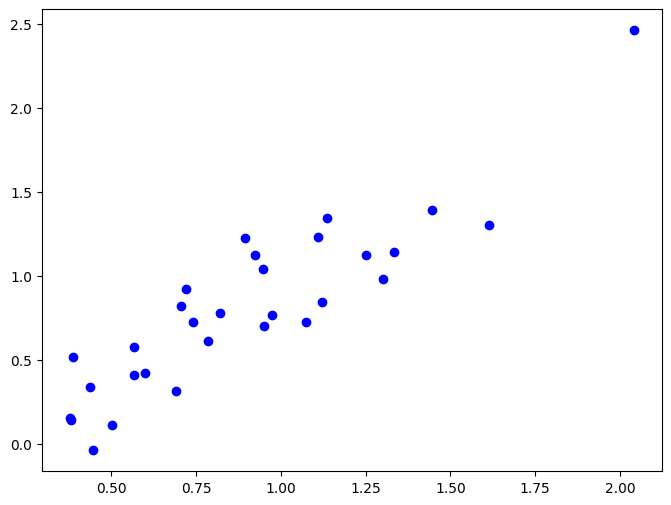

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(comparison_df['Raw Beta (Arithmetic)'], comparison_df['Raw Beta OS'], color='blue', label='Data Points')

In [ ]:
X_plot = comparison_df['Raw Beta (Arithmetic)'].values.reshape(-1, 1)
y_plot = comparison_df['Raw Beta OS'].values
model = LinearRegression().fit(X_plot, y_plot)
trend = model.predict(X_plot)
r_squared = model.score(X_plot, y_plot)

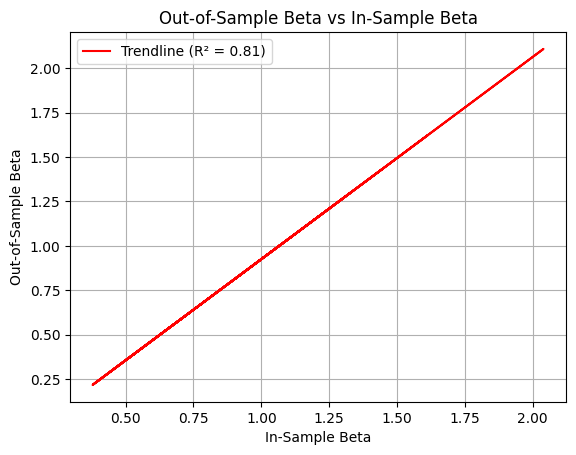

In [ ]:
plt.plot(comparison_df['Raw Beta (Arithmetic)'], trend, color='red', label=f'Trendline (R² = {r_squared:.2f})')
plt.xlabel("In-Sample Beta")
plt.ylabel("Out-of-Sample Beta")
plt.title("Out-of-Sample Beta vs In-Sample Beta")
plt.legend()
plt.grid(True)

In [ ]:
slope = model.coef_[0]
intercept = model.intercept_
print(f"Trendline Equation: y = {slope:.3f}x + {intercept:.3f} | R² = {r_squared:.4f}")

plt.show()

Trendline Equation: y = 1.138x + -0.213 | R² = 0.8059


# S.1.e

In [ ]:
T = len(market_series)
sigma_m = market_series.std()

In [ ]:
beta_bar = beta_df['Raw Beta (Arithmetic)'].mean()
beta_vasicek = {}

In [ ]:
for ticker in arith_returns.columns:
    valid = arith_returns[ticker].notna() & market_series.notna()
    X = market_series[valid]
    y = arith_returns[ticker][valid]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    beta_i = model.params[market_series.name]
    std_err_i = model.bse[market_series.name]

    nu_i = std_err_i * sigma_m * np.sqrt(T - 1)

    shrink_factor = (sigma_m * np.sqrt(T - 1) / nu_i) ** 2
    beta_v = beta_bar + (shrink_factor * (beta_i - beta_bar)) / (1 + shrink_factor)

    beta_vasicek[ticker] = beta_v

In [ ]:
beta_vasicek_df = pd.DataFrame.from_dict(beta_vasicek, orient='index', columns=['Beta Vasicek'])

In [ ]:
beta_vasicek_df

,Beta Vasicek
AAPL,1.246568
AMGN,0.392929
AMZN,1.438046
AXP,1.134142
BA,1.322565
CAT,0.895564
CRM,1.598629
CSCO,0.821362
CVX,0.785400
DIS,1.295280


In [ ]:
comparison_vasicek = beta_os_df.join(beta_vasicek_df)

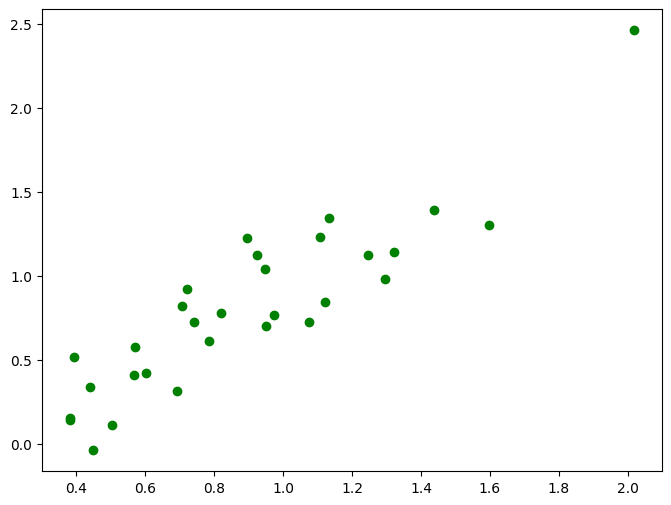

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(comparison_vasicek['Beta Vasicek'], comparison_vasicek['Raw Beta OS'], color='green')

In [ ]:
X_v = comparison_vasicek['Beta Vasicek'].values.reshape(-1, 1)
y_v = comparison_vasicek['Raw Beta OS'].values
model_v = LinearRegression().fit(X_v, y_v)
trend_v = model_v.predict(X_v)
r2_v = model_v.score(X_v, y_v)

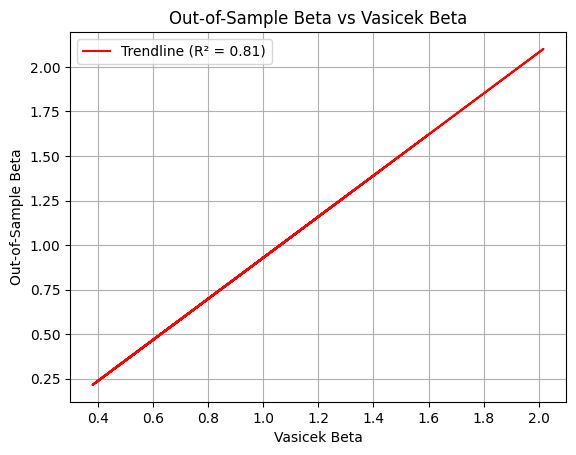

In [ ]:
plt.plot(comparison_vasicek['Beta Vasicek'], trend_v, color='red', label=f'Trendline (R² = {r2_v:.2f})')
plt.xlabel("Vasicek Beta")
plt.ylabel("Out-of-Sample Beta")
plt.title("Out-of-Sample Beta vs Vasicek Beta")
plt.grid(True)
plt.legend()

In [ ]:
slope = model_v.coef_[0]
intercept = model_v.intercept_
print(f"Trendline Equation: y = {slope:.3f}x + {intercept:.3f} | R² = {r2_v:.4f}")

plt.show()

Trendline Equation: y = 1.154x + -0.225 | R² = 0.8061


# S.1.F

In [ ]:
residual_variances = {}

In [ ]:
for ticker in arith_returns.columns:
    valid = arith_returns[ticker].notna() & market_series.notna()
    X = market_series[valid]
    y = arith_returns[ticker][valid]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()

    residuals = model.resid
    T = len(residuals)
    residual_variance = np.sum(residuals**2) / (T - 2)

    residual_variances[ticker] = residual_variance

In [ ]:
residual_df = pd.DataFrame.from_dict(residual_variances, orient='index', columns=['Residual Variance'])

residual_df = residual_df.sort_values(by='Residual Variance', ascending=False)

residual_df = residual_df.round(6)

print("📉 Residual Variances per Stock:")
print(residual_df)

📉 Residual Variances per Stock:
      Residual Variance
BA             0.002359
CRM            0.001874
NVDA           0.001864
AMZN           0.001393
CVX            0.001323
CAT            0.001309
NKE            0.001211
AXP            0.001193
DIS            0.001141
JPM            0.000963
AMGN           0.000929
GS             0.000875
WMT            0.000865
AAPL           0.000855
SHW            0.000847
IBM            0.000809
MRK            0.000748
TRV            0.000710
UNH            0.000698
HD             0.000658
CSCO           0.000642
V              0.000616
MMM            0.000584
HON            0.000579
VZ             0.000528
MSFT           0.000484
KO             0.000432
MCD            0.000427
JNJ            0.000342
PG             0.000340


# S.2 R_F for Next-to-Last Trading Days of 2022 and 2023

In [ ]:
target_dates = {
    "2022": pd.to_datetime("2022-12-29"),
    "2023": pd.to_datetime("2023-12-28")
}

rf_data = web.DataReader('DGS1', 'fred', start='2022-12-01', end='2023-12-31')
rf_data = rf_data.sort_index()

rf_values = {}
for year, date in target_dates.items():
    available_dates = rf_data.index[rf_data.index <= date]
    closest_date = available_dates[-1]
    rf_value = rf_data.loc[closest_date].values[0] / 100
    rf_values[year] = {
        "Rf": round(rf_value, 5),
        "Date Used": closest_date.strftime('%Y-%m-%d')
    }

for year in rf_values:
    print(f"{year} Rf = {rf_values[year]['Rf']} (from {rf_values[year]['Date Used']})")


2022 Rf = 0.0471 (from 2022-12-29)
2023 Rf = 0.0482 (from 2023-12-28)


In [ ]:
rf_next_to_last_2022 = 4.71 # 12/29/2022
rf_next_to_last_2023 = 4.82 # 12/28/2023

# S.3

In [ ]:
tickers = [
    'AAPL', 'AMGN', 'AMZN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS',
    'GS', 'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT',
    'NKE', 'NVDA', 'PG', 'SHW', 'TRV', 'UNH', 'V', 'VZ', 'WMT'
]
data = yf.download(tickers, start="2020-06-01", end="2023-12-31", auto_adjust=False)['Adj Close']
data = data.ffill()

cutoff_2022 = pd.to_datetime("2022-12-28")
cutoff_2023 = pd.to_datetime("2023-12-27")

weekly_dates = pd.date_range(start="2020-06-01", end="2023-12-31", freq="W-WED")
weekly_dates = [d for d in weekly_dates if d in data.index]

weekly_data = data.loc[weekly_dates]

log_returns = np.log(weekly_data / weekly_data.shift(1)).dropna()

returns_2020_2022 = log_returns[log_returns.index <= cutoff_2022]
returns_2021_2023 = log_returns[log_returns.index <= cutoff_2023]
returns_2021_2023 = returns_2021_2023[returns_2021_2023.index >= "2021-01-06"]

ann_returns_2020_2022 = returns_2020_2022.mean() * 52
ann_returns_2021_2023 = returns_2021_2023.mean() * 52

result_df = pd.DataFrame({
    "Ann. Return 2020–2022": ann_returns_2020_2022.round(6),
    "Ann. Return 2021–2023": ann_returns_2021_2023.round(6)
})

print(" Annualized Average Log Returns:")
print(result_df)

[*********************100%***********************]  30 of 30 completed

 Annualized Average Log Returns:
        Ann. Return 2020–2022  Ann. Return 2021–2023
Ticker                                              
AAPL                 0.176240               0.128409
AMGN                 0.094289               0.109261
AMZN                -0.161089              -0.022997
AXP                  0.133994               0.162619
BA                   0.032692               0.063450
CAT                  0.268001               0.189497
CRM                 -0.119923               0.060574
CSCO                 0.030890               0.071915
CVX                  0.277411               0.233925
DIS                 -0.144613              -0.230720
GS                   0.208232               0.155991
HD                   0.110851               0.115328
HON                  0.144549               0.016689
IBM                  0.097580               0.154829
JNJ                  0.091976               0.027546
JPM                  0.121893               0.128774
KO           

## S.4

In [ ]:
from google.colab import files
uploaded = files.upload()

TypeError: 'NoneType' object is not subscriptable

In [ ]:
pe_data = pd.read_csv('/content/dji_metrics.csv', index_col=0)

In [ ]:
rf_2022 = 0.0471
rf_2023 = 0.0482
risk_free_rate = 0.01

pe_2022 = pe_data["2022"].copy()
pe_2023 = pe_data["2023"].copy()

earnings_yield_2022 = 1 / pe_2022
earnings_yield_2023 = 1 / pe_2023

fallback_value = risk_free_rate - 0.01
earnings_yield_2022.replace([0, np.nan, np.inf, -np.inf], fallback_value, inplace=True)
earnings_yield_2023.replace([0, np.nan, np.inf, -np.inf], fallback_value, inplace=True)

expected_returns = pd.DataFrame({
    "earnings_yield_2022": earnings_yield_2022,
    "earnings_yield_2023": earnings_yield_2023
})

In [ ]:
tickers = expected_returns.index
mu_2022 = expected_returns["earnings_yield_2022"].values
mu_2023 = expected_returns["earnings_yield_2023"].values
beta = beta_df.loc[tickers].values.flatten()  # Ensure same order

def single_index_cov_matrix(betas, residual_vars, market_vol):
    cov = np.outer(betas, betas) * market_vol**2
    np.fill_diagonal(cov, betas**2 * market_vol**2 + residual_vars)
    return pd.DataFrame(cov, index=betas.index, columns=betas.index)

cov_matrix = single_index_cov_matrix(beta_df.squeeze(), pd.Series(residual_variances, index=beta_df.index), market_vol)

In [ ]:
def compute_weights(mu, beta, Sigma, rf):
    Sigma_inv = np.linalg.inv(Sigma)
    mu_excess = mu - rf  # excess return
    a = mu_excess @ Sigma_inv @ mu_excess
    b = mu_excess @ Sigma_inv @ beta
    c = beta @ Sigma_inv @ beta
    lam = b / c
    weights = Sigma_inv @ (mu_excess - lam * beta)
    weights /= np.sum(np.abs(weights))  # Normalize for dollar neutrality
    return weights, a, b, c, lam

In [ ]:
mn_weights_2022, a_2022, b_2022, c_2022, lam_2022 = compute_weights(mu_2022, beta, cov_matrix.values, rf=rf_2022)
mn_weights_2023, a_2023, b_2023, c_2023, lam_2023 = compute_weights(mu_2023, beta, cov_matrix.values, rf=rf_2023)

weights_df = pd.DataFrame({
    "Ticker": tickers,
    "2022 Weight %": mn_weights_2022 *100,
    "2023 Weight %": mn_weights_2023 *100
})

params_df = pd.DataFrame({
    "Year": [2022, 2023],
    "a": [a_2022, a_2023],
    "b": [b_2022, b_2023],
    "c": [c_2022, c_2023],
    "lambda": [lam_2022, lam_2023]
})

print("=== Optimal Weights ===")
print(weights_df)
print("\n=== Parameters (a, b, c, lambda) ===")
print(params_df)


In [ ]:
# Check for 2022
sum_weights_2022 = np.sum(np.abs(mn_weights_2022))
print(f"Sum of absolute 2022 weights: {sum_weights_2022:.4f}")

# Check for 2023
sum_weights_2023 = np.sum(np.abs(mn_weights_2023))
print(f"Sum of absolute 2023 weights: {sum_weights_2023:.4f}")


In [ ]:
def calculate_portfolio_metrics(weights, expected_returns, cov_matrix, rf_rate):
    port_ret = weights @ expected_returns
    port_vol = np.sqrt(weights.T @ cov_matrix @ weights)
    sharpe = (port_ret - rf_rate) / port_vol
    return port_ret, port_vol, sharpe

In [ ]:


metrics_mn_2022= calculate_portfolio_metrics(mn_weights_2022, mu_2022, cov_matrix.values, rf_2022)
metrics_mn_2023 = calculate_portfolio_metrics(mn_weights_2023, mu_2023, cov_matrix.values, rf_2023)

market_neutral_metrics = pd.DataFrame({
    "Metric": ["Expected Return", "Volatility", "Sharpe Ratio"],
    "2022": [metrics_mn_2022[0]*100, metrics_mn_2022[1]*100, metrics_mn_2022[2]],
    "2023": [metrics_mn_2023[0]*100, metrics_mn_2023[1]*100, metrics_mn_2023[2]]
})
print(market_neutral_metrics)

# S.5

In [ ]:
def compute_weights_dollar_market_neutral(mu, beta, Sigma, rf):
    Sigma_inv = np.linalg.inv(Sigma)
    mu_excess = mu - rf
    ones = np.ones_like(mu)

    M = np.array([
        [beta @ Sigma_inv @ beta,     beta @ Sigma_inv @ ones],
        [ones @ Sigma_inv @ beta,     ones @ Sigma_inv @ ones]
    ])
    rhs = np.array([
        beta @ Sigma_inv @ mu_excess,
        ones @ Sigma_inv @ mu_excess
    ])

    lam, tau = np.linalg.solve(M, rhs)

    weights = Sigma_inv @ (mu_excess - lam * beta - tau * ones)

    weights /= np.sum(np.abs(weights))

    return weights, lam, tau

In [ ]:
md_weights_2022, lam_2022, tau_2022 = compute_weights_dollar_market_neutral(mu_2022, beta, cov_matrix.values, rf_2022)
md_weights_2023, lam_2023, tau_2023 = compute_weights_dollar_market_neutral(mu_2023, beta, cov_matrix.values, rf_2023)

weights_df = pd.DataFrame({
    "Ticker": tickers,
    "2022 Weight %": md_weights_2022 *100,
    "2023 Weight %": md_weights_2023 *100
})

print("=== Optimal Weights ===")
print(weights_df)

In [ ]:
# Check for 2022
sum_weights_2022 = np.sum(np.abs(md_weights_2022))
print(f"Sum of absolute 2022 weights: {sum_weights_2022:.4f}")

# Check for 2023
sum_weights_2023 = np.sum(np.abs(md_weights_2023))
print(f"Sum of absolute 2023 weights: {sum_weights_2023:.4f}")

In [ ]:
metrics_mn_2022= calculate_portfolio_metrics(md_weights_2022, mu_2022, cov_matrix.values, rf_2022)
metrics_mn_2023 = calculate_portfolio_metrics(md_weights_2022, mu_2023, cov_matrix.values, rf_2023)

market_neutral_metrics = pd.DataFrame({
    "Metric": ["Expected Return", "Volatility", "Sharpe Ratio"],
    "2022": [metrics_mn_2022[0]*100, metrics_mn_2022[1]*100, metrics_mn_2022[2]],
    "2023": [metrics_mn_2023[0]*100, metrics_mn_2023[1]*100, metrics_mn_2023[2]]
})
print(market_neutral_metrics)

# S.6

In [ ]:
tickers = [
    'AAPL', 'AMGN', 'AMZN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS',
    'GS', 'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT',
    'NKE', 'NVDA', 'PG', 'SHW', 'TRV', 'UNH', 'V', 'VZ', 'WMT'
]

start_date = "2023-11-15"
end_date = "2023-12-29"  # will include 2023-12-28

data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

data_stacked = data.stack(level=1).reset_index()
data_stacked.columns.name = None

In [ ]:
adv_dict = {}
price_dict = {}

for ticker in tickers:
    df_ticker = data_stacked[data_stacked['Ticker'] == ticker]
    df_ticker = df_ticker.sort_values('Date')

    # 21-day ADV
    adv_dict[ticker] = df_ticker['Volume'].iloc[-21:].mean()

    price_row = df_ticker[df_ticker['Date'] == pd.to_datetime("2023-12-28")]
    if not price_row.empty:
        price_dict[ticker] = price_row['Close'].values[0]
    else:
        price_dict[ticker] = None

adv_series = pd.Series(adv_dict)
price_series = pd.Series(price_dict)

In [ ]:
def compute_gamma_vector(adv, price, aum):
    dollar_volume = adv * price
    volume_fraction = 0.0159 * dollar_volume
    gamma_i = 0.001 / volume_fraction
    return gamma_i

In [ ]:
def estimate_average_gamma(gamma_vector):
    return gamma_vector.mean()

In [ ]:
def optimize_with_transaction_costs(mu, beta, Sigma, rf, x0, gamma):
    n = len(mu)
    Sigma_inv = np.linalg.inv(Sigma)
    mu_excess = mu - rf
    ones = np.ones(n)

    adjusted_mu = mu_excess - gamma * Sigma @ (np.zeros(n) - x0)

    A = np.array([
        [beta @ Sigma_inv @ beta, beta @ Sigma_inv @ ones],
        [ones @ Sigma_inv @ beta, ones @ Sigma_inv @ ones]
    ])
    rhs = np.array([
        beta @ Sigma_inv @ adjusted_mu,
        ones @ Sigma_inv @ adjusted_mu
    ])
    lam, tau = np.linalg.solve(A, rhs)

    weights = Sigma_inv @ (adjusted_mu - lam * beta - tau * ones)
    weights /= np.sum(np.abs(weights))  # normalize for dollar neutrality
    return weights, lam, tau

In [ ]:

aum = 32e9
rf_2023 = 0.0482
x0 = md_weights_2023  # from Q5
Sigma = cov_matrix.values

gamma_vector = compute_gamma_vector(adv=adv_series, price=price_series, aum=aum)
gamma_avg = estimate_average_gamma(gamma_vector)

w_tc_2024, lam_tc, tau_tc = optimize_with_transaction_costs(mu_2023, beta, Sigma, rf_2023, x0, gamma_avg)

weights_df = pd.DataFrame({
    "Ticker": tickers,
    "2024 Weight %": w_tc_2024 *100
})

print("=== Optimal Weights ===")
print(weights_df)

In [ ]:
# Check weight
sum_weights_2024 = np.sum(np.abs(w_tc_2024))
print(f"Sum of absolute 2023 weights: {sum_weights_2024:.4f}")

In [ ]:
# Step 3: Portfolio performance
ret_tc, vol_tc, sharpe_tc = calculate_portfolio_metrics(w_tc_2024, mu_2023, cov_matrix.values, rf_2023)

print("=== Transaction Cost Portfolio (2023) ===")
print(f"Gamma (avg): {gamma_avg:.2e}")
print(f"Expected Return: {ret_tc*100:.4f}")
print(f"Volatility: {vol_tc*100:.4f}")
print(f"Sharpe Ratio: {sharpe_tc:.4f}")
print(f"Market Neutrality (w.T @ beta): {np.dot(w_tc_2024, beta):.6f}")


# S_7

In [ ]:
target_dates = {
    "2024": pd.to_datetime("2024-12-30")
}

# Download 1Y Treasury daily data from FRED
rf_data = web.DataReader('DGS1', 'fred', start='2023-12-01', end='2024-12-31')
rf_data = rf_data.sort_index()

# Find the closest previous available date for each target
rf_values = {}
for year, date in target_dates.items():
    # Find the last available Rf date on or before target
    available_dates = rf_data.index[rf_data.index <= date]
    closest_date = available_dates[-1]
    rf_value = rf_data.loc[closest_date].values[0] / 100  # convert % to decimal
    rf_values[year] = {
        "Rf": round(rf_value, 5),
        "Date Used": closest_date.strftime('%Y-%m-%d')
    }

# Show results
for year in rf_values:
    print(f"{year} Rf = {rf_values[year]['Rf']} (from {rf_values[year]['Date Used']})")


In [ ]:
tickers = [
    'AAPL', 'AMGN', 'AMZN', 'AXP', 'BA', 'CAT', 'CRM', 'CSCO', 'CVX', 'DIS',
    'GS', 'HD', 'HON', 'IBM', 'JNJ', 'JPM', 'KO', 'MCD', 'MMM', 'MRK', 'MSFT',
    'NKE', 'NVDA', 'PG', 'SHW', 'TRV', 'UNH', 'V', 'VZ', 'WMT'
]

data_stocks = yf.download(tickers, start="2023-01-10", end="2024-12-30", auto_adjust=False)['Adj Close']
data_market = yf.download('^SPX', start="2023-01-10", end="2024-12-30", auto_adjust=False)['Adj Close']

data_stocks = data_stocks.ffill()
data_market = data_market.ffill()

wed_dates = pd.date_range(start="2023-01-12", end="2024-12-27", freq='W-WED')
available_dates = data_stocks.index

final_dates = []
for date in wed_dates:
    fallback = date
    while fallback not in available_dates and fallback >= available_dates[0]:
        fallback -= pd.Timedelta(days=1)
    if fallback >= available_dates[0]:
        final_dates.append(fallback)

weekly_prices = data_stocks.loc[final_dates]
weekly_prices_market = data_market.loc[final_dates]

log_returns = np.log(weekly_prices / weekly_prices.shift(1)).dropna()
log_returns_market = np.log(weekly_prices_market / weekly_prices_market.shift(1)).dropna()

In [ ]:
returns_2023 = log_returns.loc["2023-01-12":"2023-12-28"]
returns_2024 = log_returns.loc["2024-01-04":"2024-12-27"]

In [ ]:
## calculating q4 for 2024
rf_2024 = 0.0417
pe_2024 = pe_data["2024"].copy()
earnings_yield_2024 = 1 / pe_2024
earnings_yield_2024.replace([0, np.nan, np.inf, -np.inf], fallback_value, inplace=True)
mu_2024 = earnings_yield_2024.values
mn_weights_2024, a_2024, b_2024, c_2024, lam_2024 = compute_weights(mu_2024, beta, cov_matrix.values, rf=rf_2024)

In [ ]:
## calculating q5 for 2024
md_weights_2024, lam_2024, tau_2024 = compute_weights_dollar_market_neutral(mu_2024, beta, cov_matrix.values, rf_2024)

In [ ]:
def compute_portfolio_returns(returns_df, weights):
    port_returns = returns_df @ weights
    return port_returns


In [ ]:
def annualized_metrics(returns, rf):
    weeks = len(returns)
    mean = returns.mean() * 52
    std = returns.std() * np.sqrt(52)
    sharpe = (mean - rf) / std
    return mean, std, sharpe


In [ ]:
port_mn_2023 = compute_portfolio_returns(returns_2023, mn_weights_2023)
port_md_2023 = compute_portfolio_returns(returns_2023, md_weights_2023)
port_mn_2024 = compute_portfolio_returns(returns_2024, mn_weights_2024)
port_md_2024 = compute_portfolio_returns(returns_2024, md_weights_2024)
port_md_tc_2024 = compute_portfolio_returns(returns_2024, w_tc_2024)


spx_2023 = log_returns_market.loc["2023-01-12":"2023-12-28"]
spx_2024 = log_returns_market.loc["2024-01-04":"2024-12-27"]

In [ ]:
rf_2023 = 0.0471
rf_2024 = 0.0482

metrics = pd.DataFrame({
    "Market-Neutral 2023": annualized_metrics(port_mn_2023, rf_2023),
    "Dollar-Neutral 2023": annualized_metrics(port_md_2023, rf_2023),
    "Market-Neutral 2024": annualized_metrics(port_mn_2024, rf_2024),
    "Dollar-Neutral 2024": annualized_metrics(port_md_2024, rf_2024),
    "Dollar-Neutral TC 2024": annualized_metrics(port_md_tc_2024, rf_2024),
    "SPX 2023": annualized_metrics(spx_2023, rf_2023),
    "SPX 2024": annualized_metrics(spx_2024, rf_2024)
})


In [ ]:
metrics_df = metrics.T
metrics_df.columns = ["Return", "Volatility", "Sharpe Ratio"]

metrics_df = metrics_df.round(4)

print(" Portfolio Performance Metrics:\n")
print(metrics_df)
